<h1> Support Vector Machine </h1>

### Employee Promotion Evaluation

## Table of Contents
1. [Data Description](#dd)
2. [Loading the packages and dataset](#loading)
3. [Exploratory Data Analysis](#eda)
4. [Splitting the data into Training and Test data](#split)
5. [Building the SVM model](#build)
6. [Predictions from the model](#pred)
7. [Evaluating the model](#eval)

### 1. Data Description  <a id='dd'>
    
#### Attribute description
employee_id -	Unique ID for employee <br/>
department - Department of employee <br/>
region	- Region of employment (unordered)<br/>
education -	Education Level<br/>
gender	- Gender of Employee<br/>
recruitment_channel	- Channel of recruitment for employee<br/>
no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.<br/>
age	- Age of Employee<br/>
previous_year_rating -	Employee Rating for the previous year<br/>
length_of_service -	Length of service in years<br/>
KPIs_met >80%	- if Percent of KPIs(Key performance Indicators) >80% then 1 else 0<br/>
awards_won?	- if awards won during previous year then 1 else 0<br/>
avg_training_score -	Average score in current training evaluations<br/>
is_promoted	(Target) - Recommended for promotion<br/>



#### Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.	They first identify a set of employees based on recommendations/ past performance
2.	Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3.	At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

### 2. Loading the packages and dataset  <a id='loading'>

In [2]:
# Loading the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\SVM\Assignment\attachment_train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
#Drop few columns from the dataset
df = df.drop(['employee_id','region','education'],axis=1)  

In [6]:
#Let's deal with the null values 
df.isnull().sum()

department                 0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
#lets' fill-in the null values of previous_year_rating column by the mean of the previous_year_rating
df.previous_year_rating.fillna(df.previous_year_rating.mean(),inplace=True)

In [8]:
#Rechecking to see if there aren't any null values in any other column
df.isnull().sum()

department              0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
df.head()

,department,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,m,other,2,39,1.0,10,0,0,50,0
4,Technology,m,other,1,45,3.0,2,0,0,73,0


**Data Cleaning**

In [10]:
#Let's import Label Encoder module from scikit learn package

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.department = le.fit_transform(df.department.astype(str))
df.department = df.department.astype('category')

df.gender = le.fit_transform(df.gender.astype(str))
df.gender = df.gender.astype('category')

df.recruitment_channel = le.fit_transform(df.recruitment_channel.astype(str))
df.recruitment_channel = df.recruitment_channel.astype('category')

**Descriptive Statistics**

In [11]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


From above we can see that standard deviation is varying alot which implies there's a lot of variance in the dataset

### 3. Exploratory Data Analysis   <a id='eda'>

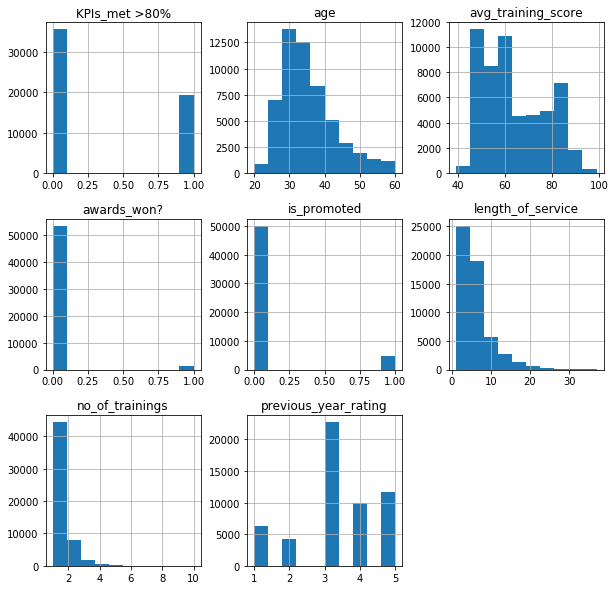

In [12]:
#Let's plot histogram 
df.hist(figsize=(10,10))
plt.show()

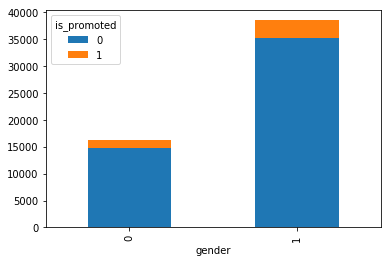

In [13]:
#Let's plot by groupping gender and promotion
ed = df.groupby(['gender','is_promoted']).size().unstack()
ed.plot(kind='bar',stacked=True)

In [14]:
ed['perc'] = (ed[1]/(ed[0] + ed[1]))
ed

is_promoted,0,1,perc
gender,,,
0,14845,1467,0.089934
1,35295,3201,0.083151


**Observations:** From the above plot, it is clear that gender is also not a factor to consider which means that the employees are getting promoted irrespective of gender

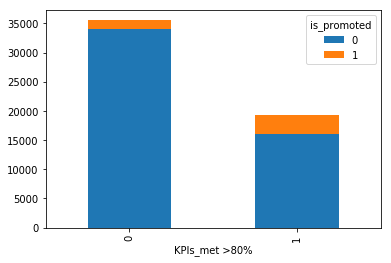

In [15]:
#Let's plot by groupping gender and promotion
ed2 = df.groupby(['KPIs_met >80%','is_promoted']).size().unstack()
ed2.plot(kind='bar',stacked=True)

In [16]:
ed2['perc'] = (ed2[1]/(ed2[0] + ed2[1]))
ed2

is_promoted,0,1,perc
KPIs_met >80%,,,
0,34111,1406,0.039587
1,16029,3262,0.169094


**Observations:** From the above plot, it is clear that KPI>80% is also not a factor to consider which means that the employees are getting promoted irrespective of KPI greater or lesser than 80%

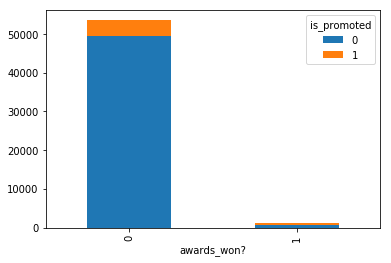

In [17]:
#Let's plot by groupping gender and promotion
awards = df.groupby(['awards_won?','is_promoted']).size().unstack()
awards.plot(kind='bar',stacked=True)

In [18]:
awards['perc'] = (awards[1]/(awards[0] + awards[1]))
awards

is_promoted,0,1,perc
awards_won?,,,
0,49429,4109,0.076749
1,711,559,0.440157


**Observation**:

**From above we can see that the employee who won awards in the previous year are more likely to be considered for promotion unlike the employees who didn't won the awards**

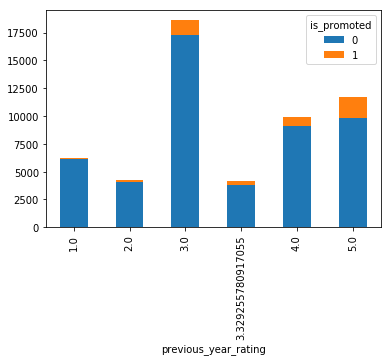

In [19]:
#### Previous Year Rating VS Promotion
rating = df.groupby(['previous_year_rating', 'is_promoted']).size().unstack()
rating.plot(kind = 'bar', stacked = True)

In [20]:
rating['perc'] = (rating[1]/(rating[0] + rating[1]))
rating

is_promoted,0,1,perc
previous_year_rating,,,
1.000000,6135,88,0.014141
2.000000,4044,181,0.042840
3.000000,17263,1355,0.072779
3.329256,3785,339,0.082202
4.000000,9093,784,0.079376
5.000000,9820,1921,0.163615


**Observations:** 

So from the above analysis, it is clear that 16% of employees got promotion who had good ratings in the previous year.

In [21]:
corr = df.corr().round(2)
corr

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.00,-0.08,-0.06,-0.06,-0.05,-0.01,0.04,-0.02
age,-0.08,1.00,0.01,0.66,-0.03,-0.01,-0.05,-0.02
previous_year_rating,-0.06,0.01,1.00,0.00,0.34,0.03,0.07,0.15
length_of_service,-0.06,0.66,0.00,1.00,-0.08,-0.04,-0.04,-0.01
KPIs_met >80%,-0.05,-0.03,0.34,-0.08,1.00,0.10,0.08,0.22
awards_won?,-0.01,-0.01,0.03,-0.04,0.10,1.00,0.07,0.20
avg_training_score,0.04,-0.05,0.07,-0.04,0.08,0.07,1.00,0.18
is_promoted,-0.02,-0.02,0.15,-0.01,0.22,0.20,0.18,1.00


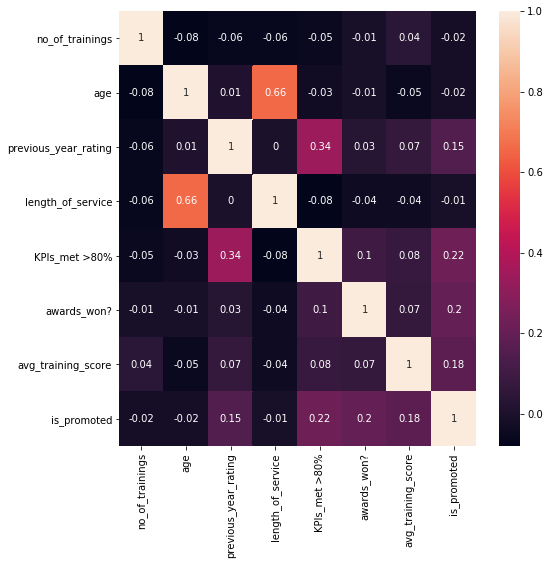

In [22]:
#Correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

### 4. Splitting the data in Training and Test data   <a id='split'>

In [23]:
#Spliting the dataset into labels and predictors
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

0    50140
1     4668
Name: is_promoted, dtype: int64


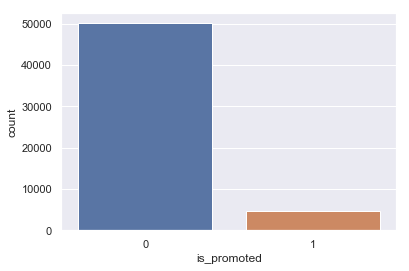

In [24]:
print(y.value_counts())

sns.set(style="darkgrid")
ax = sns.countplot(x="is_promoted", data= df)

It is evident that there is a class imbalance in Target variable. Lets handle that with SMOTE technique

#### SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_train_target = oversampler.fit_sample(X_train,y_train)
smote_test,smote_test_target =oversampler.fit_sample(X_test,y_test)

Using TensorFlow backend.


### 5. Building the SVM model  <a id='build'>

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer

svc=SVC(kernel='linear')
svc_fit = svc.fit(smote_train,smote_train_target) 

### 6. Predictions from the model  <a id='pred'>

In [27]:
y_predict_train = svc_fit.predict(smote_train)
y_predict_test=svc_fit.predict(smote_test)

### 7. Evaluating the model   <a id='eval'>

In [28]:
#Importing cross_validation module
from sklearn.model_selection import cross_val_score 

score_knn = cross_val_score(svc, smote_train, smote_train_target, cv=4)
print("Cross Validation:" + str(score_knn))
print("Cross Validation Mean:" + str(score_knn.mean()))

Cross Validation:[0.73385719 0.73621868 0.74208428 0.73627563]
Cross Validation Mean:0.737108944840784


In [29]:
#Classification Report
cls_rpt = classification_report(smote_test_target, y_predict_test)
print(cls_rpt)

              precision    recall  f1-score   support

           0       0.76      0.68      0.71     15019
           1       0.71      0.78      0.74     15019

    accuracy                           0.73     30038
   macro avg       0.73      0.73      0.73     30038
weighted avg       0.73      0.73      0.73     30038



In [30]:
#Confusion Matrix
cf = confusion_matrix(smote_test_target,y_predict_test)
cf

array([[10170,  4849],
       [ 3270, 11749]], dtype=int64)

In [31]:
#Accuracy

print("Train Accuracy Score:", accuracy_score(smote_train_target, y_predict_train))
print("Test Accuracy Score:", accuracy_score(smote_test_target, y_predict_test))

Train Accuracy Score: 0.7386036844053415
Test Accuracy Score: 0.7297090352220521
